In [ ]:
pip install transformers

In [ ]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis',model="DistilBert-base-uncased-finetuned-sst-2-english")
#classifier = pipeline('sentiment-analysis',model="xyz")
# default model is DistilBert-base-uncased-finetuned-sst-2-english
#DistilBert-base  - model
#uncased - small case
# sst-2 eng dataset type


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
classifier("i love coding")

[{'label': 'POSITIVE', 'score': 0.9996923208236694}]

In [ ]:
classifier("i love coding but I hate debugging")

[{'label': 'POSITIVE', 'score': 0.5278215408325195}]

In [ ]:
a=classifier("i hate cricket")
print(a[0]['label'])
classifier("i hate cricket")

NEGATIVE


[{'label': 'NEGATIVE', 'score': 0.9991239905357361}]

In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
#to tokenize , convert to token(on internet numbers)

In [ ]:
model_name = "DistilBert-base-uncased-finetuned-sst-2-english"
# This model only exists in PyTorch, so we use the `from_pt` flag to import that model in TensorFlow.
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)
tokenizer = AutoTokenizer.from_pretrained(model_name)
classifier = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [ ]:
'''import requests
from bs4 import BeautifulSoup

websites = {
    "The Hindu": "https://www.thehindu.com/business/budget/budget-2024-live-updates-nirmala-sitharaman-presents-interim-budget-february-1/article67796321.ece",
    "Hindustan Times": "https://www.hindustantimes.com/india-news/parliament-budget-session-live-updates-rajya-sabha-lok-sabha-bill-latest-news-today-february-8-2024-101707353159909.html",
    "Times of India": "https://timesofindia.indiatimes.com/business/budget",
}'''


In [ ]:
import urllib.request
from bs4 import BeautifulSoup

# here we have to pass url and path
# (where you want to save your text file)
urllib.request.urlretrieve("https://indiamedtoday.com/2024-budget-reactions/",
						"text_file.txt")

file = open("text_file.txt", "r")
contents = file.read()
soup = BeautifulSoup(contents, 'html.parser')

f = open("test1.txt", "w")

# traverse paragraphs from soup
for data in soup.find_all("p"):
	sum = data.get_text()
	f.writelines(sum)

f.close()


In [ ]:
# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Function to scrape a website and return its text content
def scrape_website(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Extract text from the soup
        return soup.get_text(separator=' ')#soup.find_all('p').
    else:
        print(f"Failed to retrieve content from {url}")
        return None
'''
# Function to check if text contains business-related content using regex
def has_business_content(text):
    # Define a simple regex pattern for demonstration
    business_pattern = r'\b(business|company|corporation|finance)\b'
    return bool(re.search(business_pattern, text, re.IGNORECASE))
'''
# Example usage
url = 'https://www.cnbc.com/finance/'  # Replace with the URL of the website you want to scrape
webpage_text = scrape_website(url)

if webpage_text:
    if has_business_content(webpage_text):
        print("The webpage contains business-related content.")
    else:
        print("The webpage does not seem to contain business-related content.")

    # Tokenize the text
    words = word_tokenize(webpage_text)

    # Create a PorterStemmer
    ps = PorterStemmer()
    print(type(ps))

    # Apply stemming to each word
    stemmed_words = [ps.stem(word) for word in words]

    # Calculate the number of types (unique words)
    unique_words = set(stemmed_words)
    num_types = len(unique_words)

    # Print results
    print("Number of tokens:", len(words))
    print("Number of types (unique words):", num_types)
    print("Tokenized words:", words)

NameError: name 'has_business_content' is not defined

# Main Section

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

webpage_text = ""
paragraphs = soup.find_all('p')
for paragraph in paragraphs:
    webpage_text += paragraph.text

lines = webpage_text.split('.')

with open("output.txt", "w") as f:
    for line in lines:
        processed_line = re.sub(r"[^a-z0-9\s]", "", line.lower())
        f.write(processed_line + "\n")
        print(processed_line + "\n")


union finance minister nirmala sitaraman in her interim budget 202425 has emphasised the need for vaccinating girls in the age group of 9 to 14 years with hpv vaccination to protect them from cervical cancer

 it is good to see the increasing concern of the government in addressing in growing menace

 this age range is perfectly suitable because it offers the best protection before girls become sexually active when they are most susceptible to hpv infection

 i believe the awareness about safety of hpv vaccine is much needed to be spread and by this initiative of government people will get more aware and will timely get the vaccines without having a second thought whether the vaccine is safe or not

 looking forward for more such initiatives by government to treat other kinds of cancer as well

   having worked across diverse healthcare systems i can see that india is taking important steps towards building the next phase of its healthcare ecosystem with a shift towards more affordable

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
from transformers import pipeline
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import csv

def score_and_write(line, writer):
    classifier = pipeline('sentiment-analysis')
    results = classifier(line)
    if results[0]['label']=='NEGATIVE' and results[0]['score'] > 0.7:
        writer.writerow(["bad", line])
    elif results[0]['label']=='POSITIVE' and results[0]['score'] > 0.7:
        writer.writerow(["good", line])
    else:
        writer.writerow(["neutral", line])

webpage_text = ""
paragraphs = soup.find_all('p')
for paragraph in paragraphs:
    webpage_text += paragraph.text

lines = webpage_text.split('.')


with open("output.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["sentiment", "content"])
    for line in lines:
        processed_line = re.sub(r"[^a-z0-9\s]", "", line.lower())
        score_and_write(processed_line, writer)

print("Processed content written to output.csv")



No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-englis

Processed content written to output.csv


In [ ]:
#classifier = pipeline('sentiment-analysis')
results = classifier("i  am sorry to say i am thoroughly disappointed with the interim budget")
print(results)

[{'label': 'NEGATIVE', 'score': 0.9996238946914673}]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()  #  Seaborn style plt got discontinues since specific version

df = pd.read_csv('output.csv', encoding='ISO-8859-1')
print(df.head())


  sentiment                                            content
0      good  union finance minister nirmala sitaraman in he...
1      good   it is good to see the increasing concern of t...
2      good   this age range is perfectly suitable because ...
3      good   i believe the awareness about safety of hpv v...
4      good   looking forward for more such initiatives by ...


In [ ]:
df.isna().sum()
df['sentiment'].value_counts()
print(df.columns)

Index(['sentiment', 'content'], dtype='object')


In [ ]:
y=df['sentiment'].values
y.shape

(400,)

In [ ]:
x=df['content'].values
x.shape

(400,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(240,)
(240,)
(160,)
(160,)


In [ ]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'news'})
df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)
df_train.head()

,news,sentiment
0,Â to address the dearth of doctors in india th...,good
1,further the decision to expand medical educat...,good
2,however we feel if customs duty on medical de...,good
3,bringing maternal and child healthcare schemes...,good
4,these measures will not only enhance healthca...,good


from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('news').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'news'})
df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)
df_test.head()

,news,sentiment
0,Â Â Â the governments focus on nation first ac...,good
1,64 per cent,good
2,while the customs duty has not gone down whic...,good
3,around 65 per cent of our population still ac...,good
4,additionally the emphasis on innovation and t...,good


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('news').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""
  for i in text:
    if i not in string.punctuation:
      ans+=i
  return ans
#storing the puntuation free text in a new column called clean_msg
df_train['news']= df_train['news'].apply(lambda x:remove_punctuation(x))
df_test['news']= df_test['news'].apply(lambda x:remove_punctuation(x))
df_train.head()
#punctuations are removed from news column in train dataset


,news,sentiment
0,Â to address the dearth of doctors in india th...,good
1,further the decision to expand medical educat...,good
2,however we feel if customs duty on medical de...,good
3,bringing maternal and child healthcare schemes...,good
4,these measures will not only enhance healthca...,good


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
#sample!
generate_N_grams("The sun rises in the east",2)

Sentence after removing stopwords: ['The', 'sun', 'rises', 'east']


['The sun', 'sun rises', 'rises east']

Sentence after removing stopwords: ['Â\xa0to', 'address', 'dearth', 'doctors', 'india', 'government', 'thoughtfully', 'planned', 'set', 'medical', 'colleges', 'utilising', 'existing', 'hospital', 'infrastructure']
Sentence after removing stopwords: ['', 'decision', 'expand', 'medical', 'educational', 'institutions', 'using', 'existing', 'hospital', 'infrastructure', 'underscores', 'governments', 'dedication', 'skilled', 'healthcare', 'workforce', 'strengthening', 'healthcare', 'system']
Sentence after removing stopwords: ['', 'however', 'feel', 'customs', 'duty', 'medical', 'devices', 'reduced', 'india', 'would', 'journey', 'become', 'global', 'hub', 'medical', 'tourism']
Sentence after removing stopwords: ['bringing', 'maternal', 'child', 'healthcare', 'schemes', 'one', 'umbrella', 'upgrading', 'anganwadi', 'centres', 'result', 'efficient', 'resource', 'allocation', 'improve', 'outcomes', 'maternal', 'child', 'healthcare']
Sentence after removing stopwords: ['', 'measures', 'enhance',

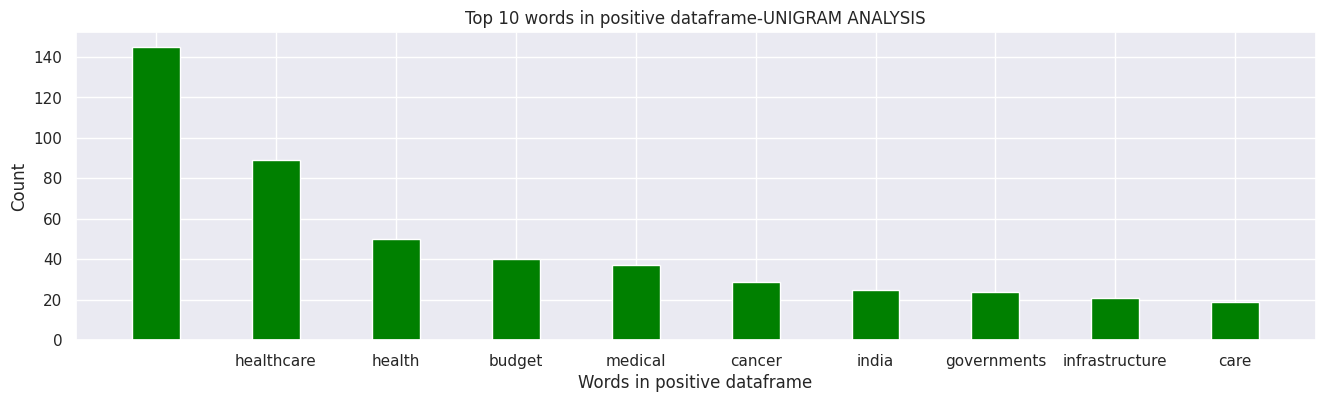

In [ ]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="good"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="bad"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

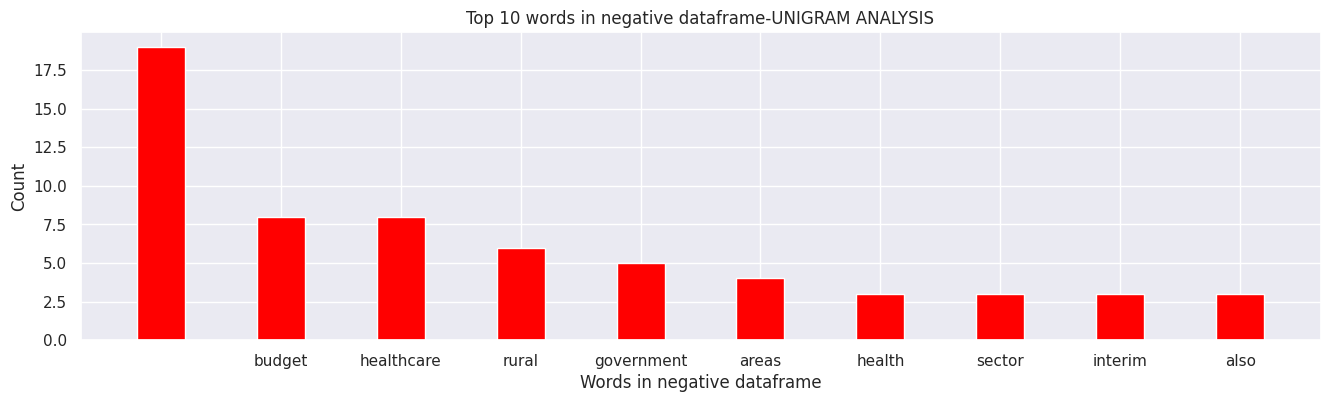

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

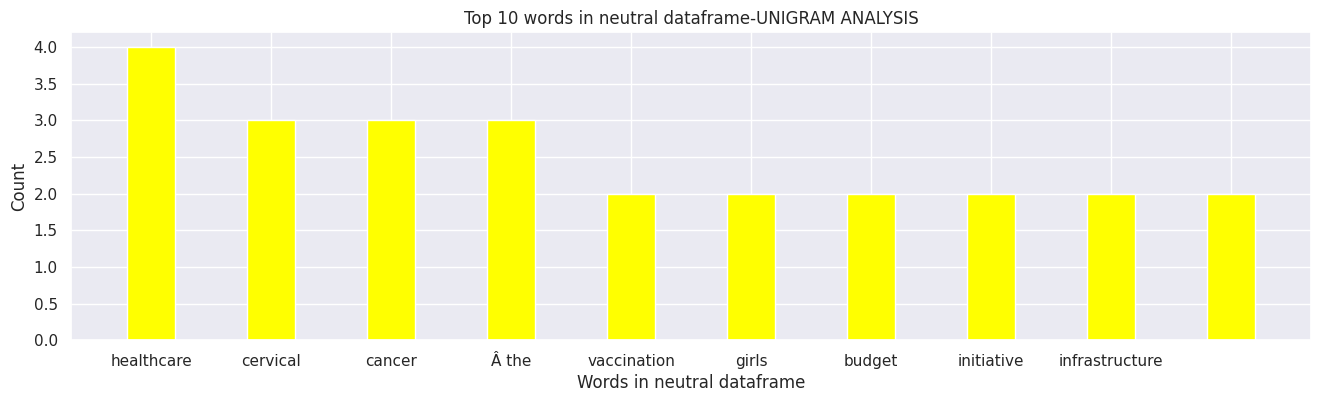

In [ ]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()


Sentence after removing stopwords: ['Â\xa0Â\xa0with', 'schemes', 'like', 'cervical', 'cancer', 'vaccination', 'younger', 'girls', 'covering', 'anganwadi', 'asha', 'workers', 'ayushman', 'bharat', 'budget', 'emphasised', 'healthcare', 'especially', 'women', 'adolescents', 'children']
Sentence after removing stopwords: ['Â\xa0the', 'initiative', 'establish', 'additional', 'medical', 'colleges', 'using', 'existing', 'infrastructure', 'address', 'shortage', 'healthcare', 'professionals', 'promising', 'better', 'healthcare', 'delivery', 'patient', 'outcomes']
Sentence after removing stopwords: ['Â\xa0the', 'finance', 'minister', 'also', 'outlined', 'prudent', 'backward', 'integrations', 'forward', 'progression', 'support']
Sentence after removing stopwords: ['', 'however', 'crucial', 'aspect', 'cervical', 'cancer', 'vaccination', 'girls', 'aged', '9', '14', 'years']
Sentence after removing stopwords: ['', 'initiative', 'crucial', 'india', 'currently', 'holds', 'unfortunate', 'distinction', 

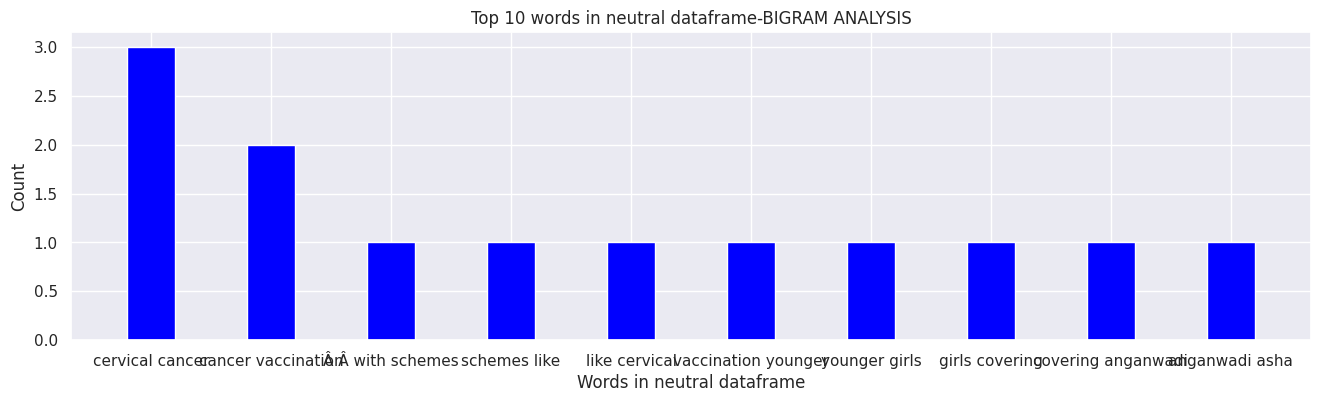

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)

# Assuming df_train and df_test dataframes are defined somewhere
# Assuming sentiment column exists in df_train dataframe

# get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text,2):
        positiveValues2[word]+=1

# get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text,2):
        negativeValues2[word]+=1

# get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text,2):
        neutralValues2[word]+=1

# focus on more frequently occurring words for every sentiment => sort in descending order wrt values
df_positive2 = pd.DataFrame(sorted(positiveValues2.items(), key=lambda x: x[1], reverse=True))
df_negative2 = pd.DataFrame(sorted(negativeValues2.items(), key=lambda x: x[1], reverse=True))
#df_neutral2 = pd.DataFrame(sorted(neutralValues2.items(), key=lambda x: x[1], reverse=True))

if not df_positive2.empty:
    print("Positive DataFrame:")
    pd1bi = df_positive2[0][:10]  # Words
    pd2bi = df_positive2[1][:10]  # Counts
    plt.figure(figsize=(16, 4))
    plt.bar(range(len(pd1bi)), pd2bi, color='green', width=0.4)
    plt.xlabel("Words in positive dataframe")
    plt.ylabel("Count")
    plt.xticks(range(len(pd1bi)), pd1bi)  # Set x-axis labels to words
    plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
    plt.savefig("positive-bigram.png")
    plt.show()

if not df_negative2.empty:
    print("Negative DataFrame:")
    nd1bi = df_negative2[0][:10]  # Words
    nd2bi = df_negative2[1][:10]  # Counts
    plt.figure(figsize=(16, 4))
    plt.bar(range(len(nd1bi)), nd2bi, color='red', width=0.4)
    plt.xlabel("Words in negative dataframe")
    plt.ylabel("Count")
    plt.xticks(range(len(nd1bi)), nd1bi)  # Set x-axis labels to words
    plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
    plt.savefig("negative-bigram.png")
    plt.show()

if not df_neutral2.empty:
    print("Neutral DataFrame:")
    nud1bi = df_neutral2[0][:10]  # Words
    nud2bi = df_neutral2[1][:10]  # Counts
    plt.figure(figsize=(16, 4))
    plt.bar(range(len(nud1bi)), nud2bi, color='blue', width=0.4)
    plt.xlabel("Words in neutral dataframe")
    plt.ylabel("Count")
    plt.xticks(range(len(nud1bi)), nud1bi)  # Set x-axis labels to words
    plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
    plt.savefig("neutral-bigram.png")
    plt.show()






Sentence after removing stopwords: ['Â\xa0Â\xa0with', 'schemes', 'like', 'cervical', 'cancer', 'vaccination', 'younger', 'girls', 'covering', 'anganwadi', 'asha', 'workers', 'ayushman', 'bharat', 'budget', 'emphasised', 'healthcare', 'especially', 'women', 'adolescents', 'children']
Sentence after removing stopwords: ['Â\xa0the', 'initiative', 'establish', 'additional', 'medical', 'colleges', 'using', 'existing', 'infrastructure', 'address', 'shortage', 'healthcare', 'professionals', 'promising', 'better', 'healthcare', 'delivery', 'patient', 'outcomes']
Sentence after removing stopwords: ['Â\xa0the', 'finance', 'minister', 'also', 'outlined', 'prudent', 'backward', 'integrations', 'forward', 'progression', 'support']
Sentence after removing stopwords: ['', 'however', 'crucial', 'aspect', 'cervical', 'cancer', 'vaccination', 'girls', 'aged', '9', '14', 'years']
Sentence after removing stopwords: ['', 'initiative', 'crucial', 'india', 'currently', 'holds', 'unfortunate', 'distinction', 

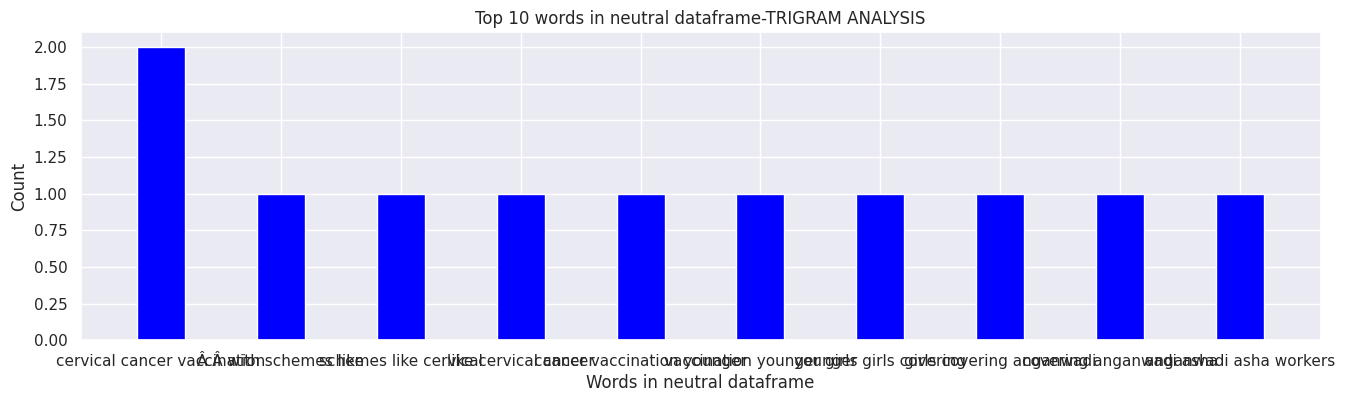

None


In [ ]:
positiveValues3 = defaultdict(int)
negativeValues3 = defaultdict(int)
neutralValues3 = defaultdict(int)

# Assuming df_train and df_test dataframes are defined somewhere
# Assuming sentiment column exists in df_train dataframe

# get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="positive"].news:
    for word in generate_N_grams(text,3):
        positiveValues3[word]+=1

# get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
    for word in generate_N_grams(text,3):
        negativeValues3[word]+=1

# get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
    for word in generate_N_grams(text,3):
        neutralValues3[word]+=1

# focus on more frequently occurring words for every sentiment => sort in descending order wrt values
df_positive3 = pd.DataFrame(sorted(positiveValues3.items(), key=lambda x: x[1], reverse=True))
df_negative3 = pd.DataFrame(sorted(negativeValues3.items(), key=lambda x: x[1], reverse=True))
df_neutral3 = pd.DataFrame(sorted(neutralValues3.items(), key=lambda x: x[1], reverse=True))

if not df_positive3.empty:
    print("Positive DataFrame:")
    pd1tri = df_positive3[0][:10]  # Words
    pd2tri = df_positive3[1][:10]  # Counts
    plt.figure(figsize=(16, 4))
    plt.bar(range(len(pd1tri)), pd2tri, color='green', width=0.4)
    plt.xlabel("Words in positive dataframe")
    plt.ylabel("Count")
    plt.xticks(range(len(pd1tri)), pd1tri)  # Set x-axis labels to words
    plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
    plt.savefig("positive-trigram.png")
    print(plt.show())

if not df_negative3.empty:
    print("Negative DataFrame:")
    nd1tri = df_negative3[0][:10]  # Words
    nd2tri = df_negative3[1][:10]  # Counts
    plt.figure(figsize=(16, 4))
    plt.bar(range(len(nd1tri)), nd2tri, color='red', width=0.4)
    plt.xlabel("Words in negative dataframe")
    plt.ylabel("Count")
    plt.xticks(range(len(nd1tri)), nd1tri)  # Set x-axis labels to words
    plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
    plt.savefig("negative-trigram.png")
    print(plt.show())

if not df_neutral3.empty:
    print("Neutral DataFrame:")
    nud1tri = df_neutral3[0][:10]  # Words
    nud2tri = df_neutral3[1][:10]  # Counts
    plt.figure(figsize=(16, 4))
    plt.bar(range(len(nud1tri)), nud2tri, color='blue', width=0.4)
    plt.xlabel("Words in neutral dataframe")
    plt.ylabel("Count")
    plt.xticks(range(len(nud1tri)), nud1tri)  # Set x-axis labels to words
    plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
    plt.savefig("neutral-trigram.png")
    print(plt.show())


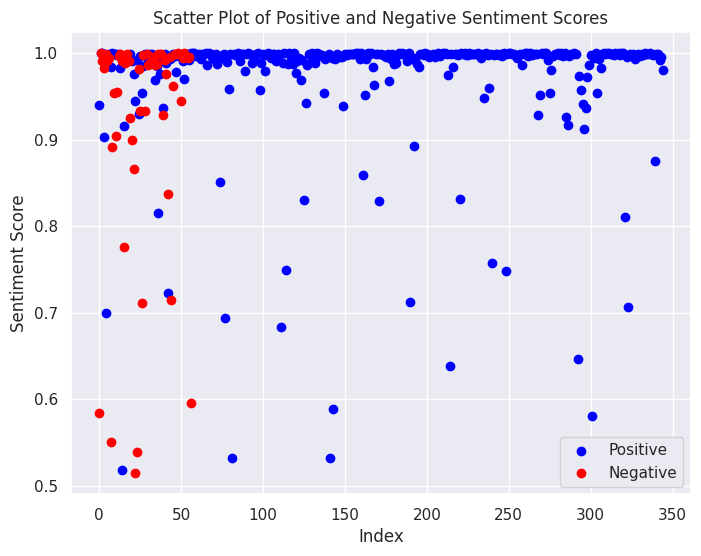

In [ ]:
import matplotlib.pyplot as plt

# Assuming classifier function is defined and accessible

# Function to generate sample data
def generate_data():
    positive_data = []
    negative_data = []

    # Open and read lines from the input file
    with open("output.txt", "r") as f:
        lines = f.readlines()
        for line in lines:
            # Classify the line and extract the sentiment score
            score = classifier(line)[0]['score']

            # Determine sentiment and append to appropriate list
            if classifier(line)[0]['label'] == 'POSITIVE':
                positive_data.append(score)
            else:
                negative_data.append(score)

    return positive_data, negative_data

# Generate sample data
positive_data, negative_data = generate_data()

# Plot scatter graph
plt.figure(figsize=(8, 6))
plt.scatter(range(len(positive_data)), positive_data, color='blue', label='Positive')
plt.scatter(range(len(negative_data)), negative_data, color='red', label='Negative')
plt.xlabel('Index')
plt.ylabel('Sentiment Score')
plt.title('Scatter Plot of Positive and Negative Sentiment Scores')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
pip install -U nltk


In [ ]:
# Sample code to remove noisy words from a text

noise_list = ["is", "a", "this", "..."]
def _remove_noise(input_text):
    words = input_text.split()
    noise_free_words = [word for word in words if word not in noise_list]
    noise_free_text = " ".join(noise_free_words)
    return noise_free_text

print(_remove_noise("this is a sample text"))

sample text


In [ ]:
# Sample code to remove a regex pattern
import re

def _remove_regex(input_text, regex_pattern):
    urls = re.finditer(regex_pattern, input_text)
    for i in urls:
        input_text = re.sub(i.group().strip(), '', input_text)
    return input_text

regex_pattern = "#[\w]*"

_remove_regex("remove this #hashtag from analytics vidhya", regex_pattern)


'remove this  from analytics vidhya'

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "multiplying"
lem.lemmatize(word, "v")
stem.stem(word)

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
classifier("we don't like being happy")

[{'label': 'NEGATIVE', 'score': 0.9992616772651672}]

In [ ]:
classifier("we will not encourage poverty")

[{'label': 'POSITIVE', 'score': 0.9890005588531494}]